<a href="https://colab.research.google.com/github/paulapipkin/TreeModelsExercise/blob/main/00_Ensemble_Trees_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ensemble Trees Exercise (Core)

- Paula Pipkin
- 7/24

In [133]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Import models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [134]:
df = pd.read_csv('/content/drive/MyDrive/BootCamp/05 - 08 - MACHINE LEARNING/02 Week 06 - Regression Models/Boston_Housing_from_Sklearn.csv')
df.head()



,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [135]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [136]:
df.duplicated().sum()

0

- Spliting data

In [137]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


###1) Try a Decision Tree, Bagged Tree, and Random Forest.

###2) Tune each model to optimize performance on the test set.
- i'll be using random_state=42 for every test

a) Applying Decision Tree (DT)
- instantiate
- fit
- check scores
- tune
- compare scores

In [138]:
dec_tree = DecisionTreeRegressor(random_state = 42)


In [139]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [140]:
dec_tree_train_score = dec_tree.score(X_train, y_train)
dec_tree_test_score = dec_tree.score(X_test, y_test)
print(dec_tree_train_score)
print(dec_tree_test_score)

1.0
0.6193230918136841


train score is much higher than test score, overfitting must be happening

In [141]:
#checking the depth to create our loop for tuning with max_depth parameter
max_depth_DT = dec_tree.get_depth()
max_depth_DT

20

In [142]:
depths_DT  = list(range(2,max_depth_DT)) #define depth to be tested
scores_DT = pd.DataFrame(index= depths_DT, columns=['Test Score','Train Score']) #create DF for comparisson

for depth in depths_DT:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42) #instantiate
  dec_tree.fit(X_train, y_train) #fit
  #test score
  dc_tree_train_score = dec_tree.score(X_test, y_test) 
  dec_tree_test_score = dec_tree.score(X_test, y_test)
  #add to DF
  scores_DT.loc[depth, 'Train Score'] = dec_tree_train_score 
  scores_DT.loc[depth, 'Test Score'] = dec_tree_test_score



In [143]:
#grabbing the best score
sorted_scores_DT = scores_DT.sort_values(by='Test Score', ascending=False)
best_DT = sorted_scores_DT.head(1)
best_DT


,Test Score,Train Score
7,0.846377,1.0


b) Applying Bagged Tree (BT)
- instantiate
- fit
- check scores
- tune
- compare scores

In [144]:
bag_tree = BaggingRegressor(random_state = 42)
bag_tree.fit(X_train, y_train)
bag_tree_train_score = bag_tree.score(X_train, y_train)
bag_tree_test_score = bag_tree.score(X_test, y_test)
print(bag_tree_train_score.round(4))
print(bag_tree_test_score.round(4))

0.9607
0.8204


- tuning and compare using n_estimators parameter

In [145]:
bag_tree.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [146]:
#define n_estimators to be tested
estimators_BT = [10, 20, 30, 40, 50, 100]
# DF for comparisson
scores_BT = pd.DataFrame(index=estimators_BT, columns=['Train Score', 'Test Score'])
# loop for each estimator
for num_estimators in estimators_BT:
   bag_tree = BaggingRegressor(n_estimators=num_estimators, random_state=42) 
   bag_tree.fit(X_train, y_train)
   train_score_BT = bag_tree.score(X_train, y_train)
   test_score_BT = bag_tree.score(X_test, y_test)
   scores_BT.loc[num_estimators, 'Train Score'] = train_score_BT
   scores_BT.loc[num_estimators, 'Test Score'] = test_score_BT

In [147]:
#grabbing the best score
sorted_scores_BT = scores_BT.sort_values(by='Test Score', ascending=False)
best_BT = sorted_scores_BT.head(1)
best_BT


,Train Score,Test Score
40,0.97395,0.834365


at n_estimator = 40 the scores were better than default value

c) Applying Random Forest (RF)

- instantiate
- fit
- check scores
- tune (2 parameters , max_depth and n_estimator)
- compare scores

In [148]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [149]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score.round(4))
print(rf_test_score.round(4))

0.9771
0.8339


To check the max depth we will use the code bellow:


  - more details about this property: How to visualize a single Decision Tree from the Random Forest in Scikit-Learn (Python)?
  https://mljar.com/blog/visualize-tree-from-random-forest/

In [150]:
est_depths_rf = [estimator.get_depth() for estimator in rf.estimators_]
max_depth_fr = max(est_depths_rf)
max_depth_fr

23

In [151]:
#tuning max_depth based on the info above
depths_rf = range(1, max_depth_fr)
scores_rf = pd.DataFrame(index=depths_rf, columns=['Test Score'])
for depth in depths_rf:    
   model_rf = RandomForestRegressor(max_depth=depth, random_state=42)
   model_rf.fit(X_train, y_train)
   scores_rf.loc[depth, 'Train Score'] = model_rf.score(X_train, y_train)
   scores_rf.loc[depth, 'Test Score'] = model_rf.score(X_test, y_test)
   


In [152]:
sorted_scores_rf = scores_rf.sort_values(by='Test Score', ascending=False)
tune1_rf = sorted_scores_rf.head(1)
tune1_rf

,Test Score,Train Score
10,0.834747,0.973927


In [153]:
#now tuning n_estimator

n_ests = [50, 100, 150, 200, 250]
scores_rf_2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model_rf_2 = RandomForestRegressor(max_depth=10, n_estimators=n, random_state=42) #max_depth from previous tuning
   model_rf_2.fit(X_train, y_train)
   scores_rf_2.loc[n, 'Train Score'] = model_rf_2.score(X_train, y_train)
   scores_rf_2.loc[n, 'Test Score'] = model_rf_2.score(X_test, y_test)

In [154]:
sorted_scores_rf_2 = scores_rf_2.sort_values(by='Test Score', ascending=False)
tune2_rf = sorted_scores_rf_2.head(1)
tune2_rf

,Test Score,Train Score
150,0.835554,0.97304


In [155]:
print(rf_train_score.round(4))
print(rf_test_score.round(4))
print(tune1_rf)
print(tune2_rf)

0.9771
0.8339
   Test Score  Train Score
10   0.834747     0.973927
    Test Score Train Score
150   0.835554     0.97304


3) Evaluate your best model using multiple regression metrics

- let's see how each tunning for each model behaved durinf the testing loop

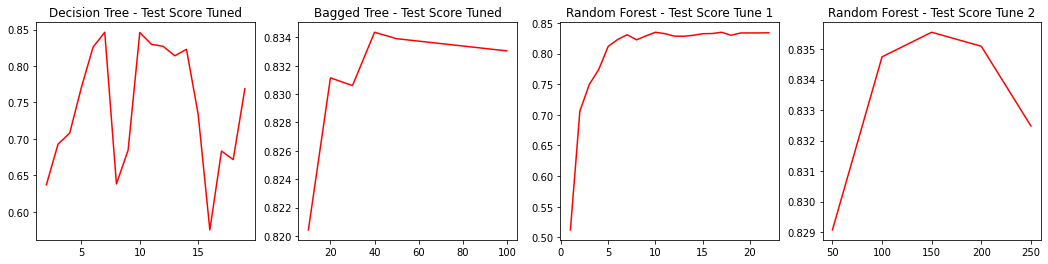

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))

#Plot 1
axes[0].plot(scores_DT.index, scores_DT['Test Score'], c='r')
axes[0].set_title('Decision Tree - Test Score Tuned' )

#Plot 2
axes[1].plot(scores_BT.index, scores_BT['Test Score'], c='r')
axes[1].set_title('Bagged Tree - Test Score Tuned' )

#Plot 3
axes[2].plot(scores_rf.index, scores_rf['Test Score'], c='r')
axes[2].set_title('Random Forest - Test Score Tune 1' )

#Plot 4
axes[3].plot(scores_rf_2.index, scores_rf_2['Test Score'], c='r')
axes[3].set_title('Random Forest - Test Score Tune 2' );


it is interesting to see how the parameters can change the score value, like in plot 1, the depth varies for worse and for better, there is no continued improvement as we decrease or increase the parameter, same for plot 4, we can also notice that for some parameters and model, onde we reach a certain number, the change on the score won't improve much


### Now let's compare all tunned models in a DF

In [157]:
final_scores = pd.DataFrame(index= ['DT', 'BT', 'RF'],columns=['Test Score', 'Train Score'])

final_scores['Test Score'].values[0] = best_DT['Test Score'].values[0]
final_scores['Test Score'].values[1] = best_BT['Test Score'].values[0]
final_scores['Test Score'].values[2] = tune2_rf['Test Score'].values[0]

final_scores['Train Score'].values[0] = best_DT['Train Score'].values[0]
final_scores['Train Score'].values[1] = best_BT['Train Score'].values[0]
final_scores['Train Score'].values[2] = tune2_rf['Train Score'].values[0]

final_scores['Difference'] = abs(final_scores['Test Score']-final_scores['Train Score']) # checking how far train and test are from each other
final_scores

,Test Score,Train Score,Difference
DT,0.846377,1.0,0.153623
BT,0.834365,0.97395,0.139584
RF,0.835554,0.97304,0.137486


4) Explain in a text cell how your model will perform if deployed by referring to the metrics. 

- Even though DT has the highest scores, I would prefer to use the RF model, because on DT the train score is = 1 and that could indicate overfitting of the model, on RF train and test are the closest and both are good scores, 0.97 and 0.83 